In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Step 1: Generate the data
np.random.seed(42)
x = np.random.randn(1000, 100)
beta_0 = 7
beta_1 = 1
y = beta_0 + beta_1 * x.sum(axis=1)

In [3]:
# Step 2: Split the data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.33, random_state=42)

In [4]:
# Step 3: Define the CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(100, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
# Step 4: Train the model
history = model.fit(x_train[..., np.newaxis], y_train, epochs=50, validation_data=(x_val[..., np.newaxis], y_val))

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 107.4400 - val_loss: 94.9709
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 69.5753 - val_loss: 59.3271
Epoch 3/50
22/22 [==============================] - 0s 6ms/step - loss: 35.9283 - val_loss: 27.0215
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 14.3500 - val_loss: 8.2115
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 4.6833 - val_loss: 3.1257
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 1.7545 - val_loss: 2.0784
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 1.0249 - val_loss: 1.4806
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.6946 - val_loss: 1.2006
Epoch 9/50
22/22 [==============================] - 0s 5ms/step - loss: 0.5212 - val_loss: 0.9889
Epoch 10/50
22/22 [==============================] - 0s 6ms/step - loss: 0.4033 - val_loss: 0.8776
Epoch 11/5

In [6]:
# Step 5: Evaluate the model
y_pred = model.predict(x_test[..., np.newaxis])
rmse = np.sqrt(np.mean((y_test - y_pred.squeeze())**2))
print(f'RMSE: {rmse}')

4/4 [==============================] - 0s 2ms/step
RMSE: 0.3743634777484208


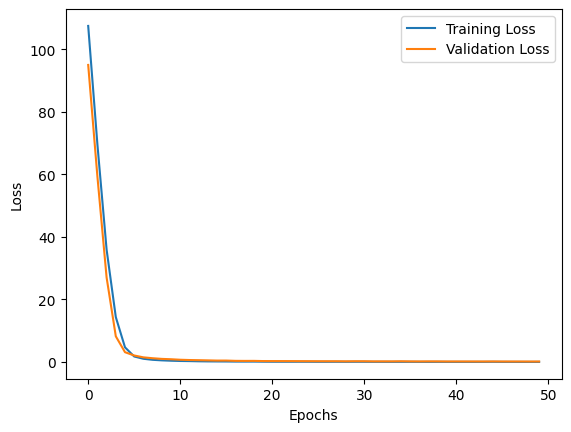

In [7]:
# Plot the RMSE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()